In [10]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [11]:
max_features = 10000  # Consider only the top 10,000 words in the dataset
maxlen = 100  # Cut off reviews after 100 words
batch_size = 32


In [12]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


In [13]:
model = Sequential()
model.add(Embedding(max_features, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))


C:\Users\ATHARVA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9849 - loss: 0.0571 - val_accuracy: 0.8398 - val_loss: 0.4547
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9882 - loss: 0.0517 - val_accuracy: 0.8312 - val_loss: 0.4950
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9905 - loss: 0.0402 - val_accuracy: 0.8346 - val_loss: 0.4921
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9932 - loss: 0.0333 - val_accuracy: 0.8322 - val_loss: 0.5126
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9949 - loss: 0.0268 - val_accuracy: 0.8300 - val_loss: 0.5375
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9958 - loss: 0.0228 - val_accuracy: 0.8302 - val_loss: 0.5560
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9977 - loss: 0.0158 - val_accuracy: 0.8272 - val_loss: 0.5883
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9979 - loss: 0.0144 - val_accuracy: 0.

In [25]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test Accuracy: {test_acc}')
from sklearn.metrics import mean_squared_error
y_pred = model.predict(test_data)
y_pred = np.round(y_pred)
print(f'MSE: {mean_squared_error(test_labels, y_pred)}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8211 - loss: 0.6386
Test Accuracy: 0.8227999806404114
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
MSE: 0.1772


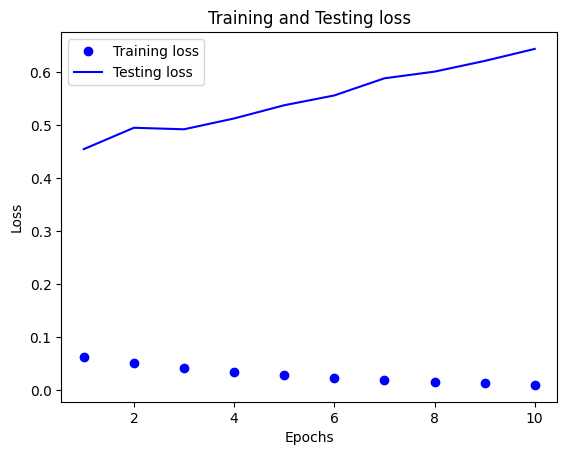

In [26]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
